Installing libraries we are going to use

In [1]:
# pip install sklearn
# pip install pandas
# pip install numpy
# pip install tensorflow
# pip install keras

# NOTE: Installing Keras and Tensorflow may vary if you are using anaconda,
# consider googling which best suites your case.Run the following commands in gitbash


In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

Load Dataset

In [3]:
# load dataset
df=pd.read_csv('static/RamanScatter.csv')

In [4]:
# print the first 5 rows
print(df.head(5))

  Incident Frequencies Modified anti-Stokes frequencies    Unnamed: 2  \
0         ω1 * 1014s-1                     ω1 + ω2 + ωD  ω1 + ω2 - ωD   
1                46.52                            46.52         57.58   
2                38.61                            38.61         49.67   
3                35.38                            35.38         46.44   
4                29.63                            29.63         40.69   

  Modified Stokes frequencies    Unnamed: 4  
0                ω1 - ω2 - ωD  ω1 - ω2 + ωD  
1                       49.34         35.46  
2                       41.43         27.55  
3                        38.2         24.32  
4                       32.45         18.57  


In [5]:
# remove the header
df.columns = [''] * len(df.columns)

In [6]:
#  assign column names
df.columns = ['Frequency_0','Frequency_1','Frequency_2','Frequency_3','Frequency_4']

In [7]:
# delete the first row 
df=df.drop(df.index[0])

In [8]:
# shuffle our data randomly then reset the index
df=shuffle(df,random_state=1)
df=df.reset_index(drop=True)

In [9]:
df.head(5)

,Frequency_0,Frequency_1,Frequency_2,Frequency_3,Frequency_4
0,17.71,22.43,21.63,12.99,13.79
1,29.63,40.96,32.09,18.3,27.17
2,17.71,29.04,20.17,6.38,15.25
3,22.7,27.04,26.75,18.36,18.65
4,18.29,24.03,23.76,12.55,12.82


In [10]:
df.shape

(80, 5)

Since we have only 80 rows in our dataset, we will need to do data augmentation to prevent the likelyhood of overfitting during training of the model.

Overfitting occurs when the model performs well on the training data but does not perform accurately in the testing data.
Data Augmentation is the techniques used to increase the amount of data by adding slightly modified copies of already existing data.

In [11]:
#perform data augmentation to remove likelyhood of overfitting
unique=df['Frequency_0'].unique().tolist()
Frequency_0=unique * 1000
import random 
random_list=[]
for i in range(0,8000):
    x=round(random.uniform(1.10,10.10),2)
    random_list.append(x)
# print(random_list)

In [12]:
list_1=[]
for i in range(0,8000):
    x=round(random.uniform(7.00,9.90),2)
    list_1.append(x)
# print(list_1)

In [13]:
df_from_list_0 = pd.DataFrame (Frequency_0, columns = ['Frequency_0'])
df_from_list= pd.DataFrame (random_list, columns = ['Difference'])

result = pd.concat([df_from_list_0, df_from_list], axis=1, join='inner')
# print (result.head(5))

In [14]:
result['Frequency_1']=result['Frequency_0'].astype(float) + result['Difference']
result['Frequency_2']=result['Frequency_1'].astype(float) - result['Difference'] - 1.00
df_from_list_1= pd.DataFrame (list_1, columns = ['Difference_1'])
result = pd.concat([result, df_from_list_1], axis=1, join='inner')
# result.head(5)

In [15]:
result['Frequency_3']=result['Frequency_0'].astype(float) - result['Difference_1']
result['Frequency_4']=result['Frequency_3'] + result['Difference']
result['Frequency_0']=result['Frequency_0'].astype(float) * 1.0
result=result.drop(['Difference','Difference_1'], axis=1)
df=df.astype(float).multiply(1.0)
df_result = pd.concat([df, result], ignore_index=True, sort=False)
result.head(5)

,Frequency_0,Frequency_1,Frequency_2,Frequency_3,Frequency_4
0,17.71,21.60,16.71,9.89,13.78
1,29.63,31.00,28.63,20.86,22.23
2,22.70,25.96,21.70,14.79,18.05
3,18.29,23.96,17.29,10.45,16.12
4,35.38,44.50,34.38,27.81,36.93


In [16]:
df_result.shape

(8080, 5)

As you can see we have increased the size of the data from 80 rows to 8080 rows

Data Visualization

<AxesSubplot:>

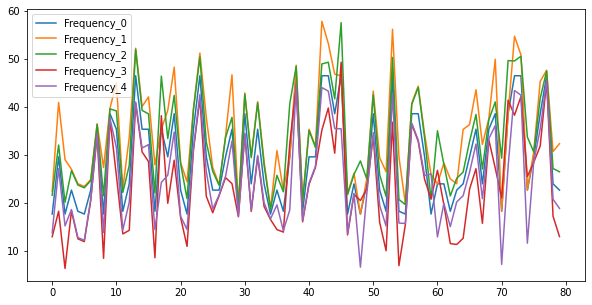

In [17]:
# visualize the data
import matplotlib.pyplot as plt
df.plot.line(figsize=(10,5))

<AxesSubplot:>

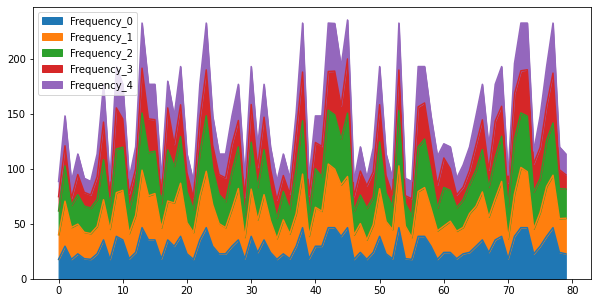

In [18]:
df.plot.area(figsize=(10,5))

We are then creating a new column and name it frequency loss.Any atom that lost more than 4 frequencies of energy is said to have cance 

In [19]:
df_result['Frequency_loss']=df_result['Frequency_1']-df_result['Frequency_2']
df_result['cancer_probability']= df_result['Frequency_loss'].apply(lambda x: 0 if x <= 4 else 1)
print(df_result.tail(20))

      Frequency_0  Frequency_1  Frequency_2  Frequency_3  Frequency_4  \
8060        35.38        43.95        34.38        26.80        35.37   
8061        38.61        48.28        37.61        28.76        38.43   
8062        24.00        33.25        23.00        15.45        24.70   
8063        46.52        54.06        45.52        39.42        46.96   
8064        17.71        20.50        16.71         7.94        10.73   
8065        29.63        39.09        28.63        21.47        30.93   
8066        22.70        24.36        21.70        14.45        16.11   
8067        18.29        21.45        17.29         9.24        12.40   
8068        35.38        36.89        34.38        27.41        28.92   
8069        38.61        43.93        37.61        30.86        36.18   
8070        24.00        27.37        23.00        14.67        18.04   
8071        46.52        53.73        45.52        39.08        46.29   
8072        17.71        25.47        16.71        

<AxesSubplot:>

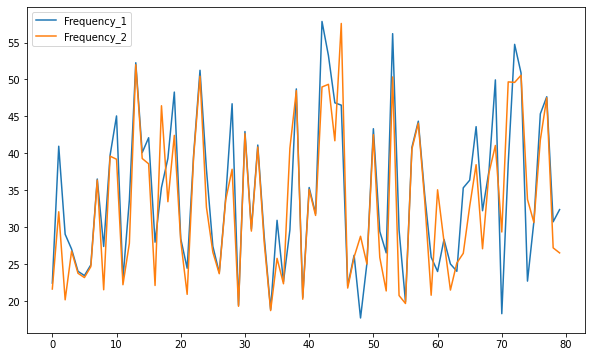

In [20]:
# plotting two columns
df.plot.line(y=['Frequency_1', 'Frequency_2'], figsize=(10,6))

<AxesSubplot:xlabel='Frequency_0'>

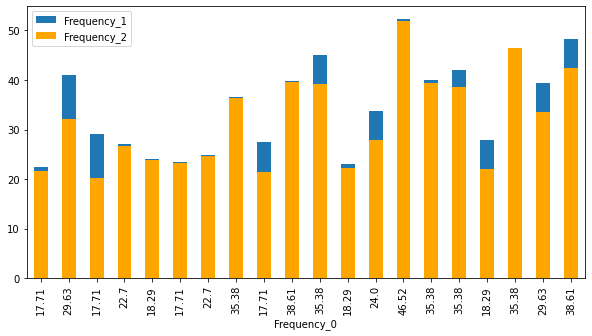

In [21]:
Features=df.filter(['Frequency_0','Frequency_1','Frequency_2'], axis=1)

# plotting Frequency_1
ax = df_result.head(20).plot(x="Frequency_0", y="Frequency_1", kind="bar",figsize=(10,5))
# plotting Frequency_2 on the same axis
df_result.head(20).plot(x="Frequency_0", y="Frequency_2", kind="bar", ax=ax, color="orange",figsize=(10,5))

<AxesSubplot:xlabel='Frequency_0'>

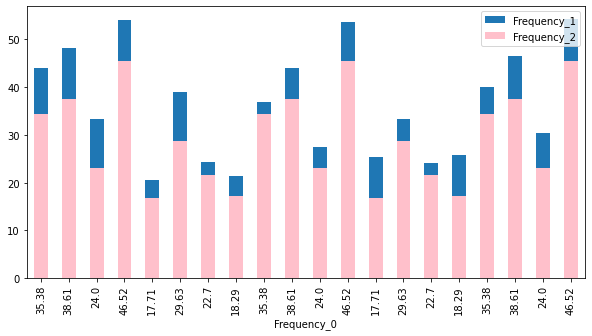

In [22]:
# plotting Frequency_1
ax = df_result.tail(20).plot(x="Frequency_0", y="Frequency_1", kind="bar",figsize=(10,5))
# plotting Frequency_2 on the same axis
df_result.tail(20).plot(x="Frequency_0", y="Frequency_2", kind="bar", ax=ax, color="pink",figsize=(10,5))

<AxesSubplot:xlabel='Frequency_0'>

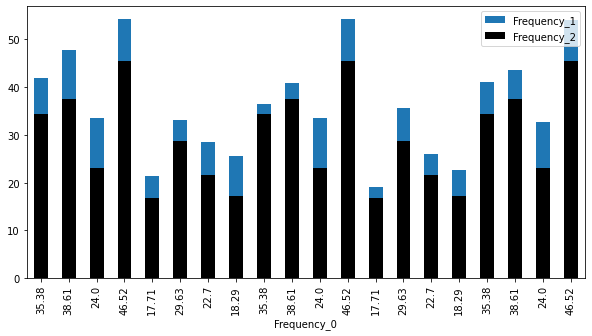

In [23]:
# plotting Frequency_1
ax = df_result[500:520].plot(x="Frequency_0", y="Frequency_1", kind="bar",figsize=(10,5))
# plotting Frequency_2 on the same axis
df_result[500:520].plot(x="Frequency_0", y="Frequency_2", kind="bar", ax=ax, color="black",figsize=(10,5))

Observation from the above graphs is that the larger the size of blue proves cancer cells.
We now want to prove this observation with neural network.

In [24]:
# Neural Network

In [25]:
# import libraries
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
data = df_result
data=data.drop(['Frequency_loss'], axis=1)

In [26]:
data.head(5)

,Frequency_0,Frequency_1,Frequency_2,Frequency_3,Frequency_4,cancer_probability
0,17.71,22.43,21.63,12.99,13.79,0
1,29.63,40.96,32.09,18.30,27.17,1
2,17.71,29.04,20.17,6.38,15.25,1
3,22.70,27.04,26.75,18.36,18.65,0
4,18.29,24.03,23.76,12.55,12.82,0


In [27]:
#Find the summary of the data 
print(data.describe())
print(data.info())

       Frequency_0  Frequency_1  Frequency_2  Frequency_3  Frequency_4  \
count  8080.000000  8080.000000  8080.000000  8080.000000  8080.000000   
mean     29.105000    34.693834    28.154479    20.686357    26.233806   
std       9.664796    10.012796     9.680910     9.710051    10.042060   
min      17.710000    17.710000    16.710000     6.380000     6.650000   
25%      21.597500    26.200000    21.700000    12.820000    17.737500   
50%      26.815000    32.560000    28.630000    19.760000    24.190000   
75%      36.187500    42.650000    37.610000    28.722500    34.250000   
max      46.520000    57.850000    57.580000    49.340000    49.360000   

       cancer_probability  
count         8080.000000  
mean             0.782178  
std              0.412791  
min              0.000000  
25%              1.000000  
50%              1.000000  
75%              1.000000  
max              1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data co

<AxesSubplot:>

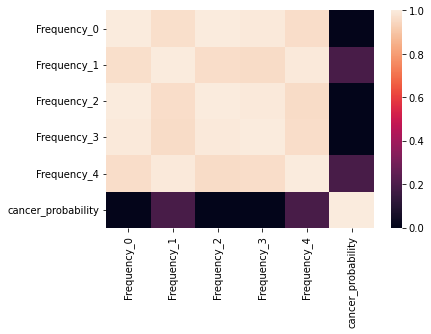

In [28]:
# finding correlation between the columns
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [29]:
#Finding correlation between two columns
print(data['Frequency_0'].corr( data["Frequency_2"]))
print(data["Frequency_3"].corr(data["Frequency_4"]))

0.9983269439980406
0.9634741808288586


In [30]:
# splitting the dataset into training and testing set
labels=data['cancer_probability']
features = data.iloc[:,0:5]
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

Outcome is the column with the label (0 or 1).
The training data set is used to train the mode, meaning find the weights and biases. The test data set is used to check its accuracy.
Labels is not an array. It is a column in a dataset. So we use the NumPy np.ravel() function to convert that to an array.

In [31]:
#Normalizing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [32]:
def f(x):
    if x<=0:
        return 0
    elif x>0:
        return 1

In [33]:
# Building sequential model with activation function ReLU
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(5,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

epoch—means how many times to run the model.

In [34]:
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
5656/5656 [==============================] - 7s 1ms/step - loss: 0.2756 - accuracy: 0.8771
Epoch 2/4
5656/5656 [==============================] - 6s 1ms/step - loss: 0.0995 - accuracy: 0.9622
Epoch 3/4
5656/5656 [==============================] - 6s 1ms/step - loss: 0.0839 - accuracy: 0.9692
Epoch 4/4
5656/5656 [==============================] - 6s 1ms/step - loss: 0.0718 - accuracy: 0.9715


In [35]:
# printing model summary
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-0.10170265,  0.1833343 , -0.52776855,  0.33172587, -1.4749725 ],
       [-1.1270263 ,  0.6071117 ,  1.0570389 ,  0.64514685,  2.6104002 ],
       [ 0.43535218, -0.00946396, -0.6625208 , -0.7166759 , -1.657455  ],
       [ 1.1213948 , -0.38926315, -0.9134409 ,  0.5412085 , -2.2107182 ],
       [-0.5026145 , -0.38953286,  1.0770384 , -0.21556905,  2.8043725 ]],
      dtype=float32), array([-2.621502e-01, -9.161185e-02,  7.641844e-01,  1.718968e-03,
        1.864222e+00], dtype=float32)]
[array([[ 0.0618682 , -0.2589815 , -0.15412524, -0.6387381 , -0.9175897 ],
       [-0.4491351 , -0.51751715, -0.06322102,  0.6398838 , -0.46030238],
       [-0.69785   ,  0.22466648, -0.10616295,  0.7081488 ,  0.8988219 ],
       [-0.67408925,  0.07617144,  0.3620358 ,  0.31430197,  0.04528056],
       [-0.25934947,  1.1666613 , -0.8987297 ,  1.4835874 ,  1.6637093 ]],
      dtype=float32), array([-0.05316215,  0.05949022,  1.7014942 ,  0.11303709,  0.20159867],
      dtype=float32)]
[array([[ 0

 Picture of the layers and their shapes. 

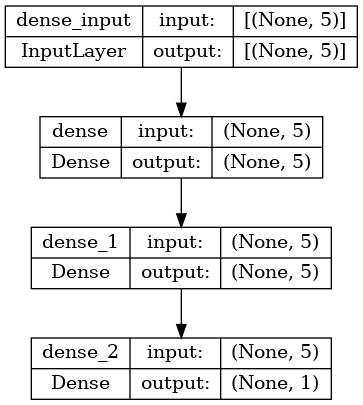

In [36]:
#  picture of the layers and their shapes. 
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

Checking the accuracy of our model

In [37]:
# configuration information on each layer
predictions = (model.predict(X_test) > 0.5).astype("int32")
score = model.evaluate(X_test, y_test,verbose=1)
print(score)
# print(predictions)

76/76 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9814
[0.05074836686253548, 0.9814356565475464]


Summarize the first 10 cases

In [38]:
# summarize the first 10 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X_train[i].tolist(), predictions[i], y_train[i]))

[-1.1869507486460331, -0.7904623832113031, -1.1904869606198925, -1.2299715157928466, -0.829964460041096] => 1 (expected 1)
[0.6421222289127739, 0.6077458756860785, 0.6371331806006078, 0.7867738890799132, 0.7514518577061577] => 1 (expected 1)
[0.6421222289127739, 0.3831942281115525, 0.6371331806006078, 0.6464067575227509, 0.39194852602683883] => 1 (expected 1)
[1.795255956700273, 1.3273091552471152, 1.7893509719529772, 1.8632659347719747, 1.3987570255498067] => 1 (expected 0)
[-1.1269132655116751, -1.2285875978122676, -1.1304971653789255, -1.0070354833197064, -1.1097994633704276] => 0 (expected 1)
[1.795255956700273, 2.08379870574263, 1.789350971952978, 1.868426491079223, 2.158593707187814] => 0 (expected 1)
[0.6421222289127739, 0.5388833704298908, 0.6371331806006078, 0.7217508796085804, 0.6199991159286782] => 1 (expected 1)
[0.9764689022299748, 1.11173957357557, 0.9712142816839245, 1.0334484805663964, 1.1707064356479668] => 1 (expected 1)
[-0.535854595344115, -0.8273886541457812, -0.53

CONCLUSION:
We have proven that the higher the loss of frequency implies Cancerous cells.This make our research study proven to be working correctly and producing expected results